Aluno: Jones Martimiano Coelho
MAtricula: 97237

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [7]:
data: pd.DataFrame = pd.read_csv('./data/sales_icecream.csv', sep=";", index_col=0)
data.head()

,temperatur_f,total_sales,temperature_c
date,,,
"segunda-feira, 1 de março de 2004",65F,$38.911,24
"terça-feira, 2 de março de 2004",63F,$36.337,23
"quarta-feira, 3 de março de 2004",62F,$35.728,22
"quinta-feira, 4 de março de 2004",65F,$36.945,24
"sexta-feira, 5 de março de 2004",63F,$36.335,23


In [8]:
months: dict = {
    "jan": "01",
    "fev": "02",
    "mar": "03",
    "abr": "04",
    "mai": "05",
    "jun": "06",
    "jul": "07",
    "ago": "08",
    "set": "09",
    "out": "10",
    "nov": "11",
    "dez": "12"
}
# Data preprocessing
data['day_of_week'] = list(map(lambda x: x.split(",")[0][:3], data.index))
data['month_of_sale'] = list(map(lambda x: x.split(",")[1].strip().split(" ")[2][:3], data.index))
data['total_sales'] = data['total_sales'].apply(lambda x: x.replace("$", "")).astype(float)
data['temperatur_f'] = data['temperatur_f'].apply(lambda x: x.replace("F", "")).astype(float)
data['year'] = list(map(lambda x: x.split(",")[1].strip().split(" ")[4], data.index))
data['month_year'] = data["year"] + data["month_of_sale"].apply(lambda x: months[x])
# Display the updated dataframe
data.head(15)

,temperatur_f,total_sales,temperature_c,day_of_week,month_of_sale,year,month_year
date,,,,,,,
"segunda-feira, 1 de março de 2004",65.0,38.911,24,seg,mar,2004,200403
"terça-feira, 2 de março de 2004",63.0,36.337,23,ter,mar,2004,200403
"quarta-feira, 3 de março de 2004",62.0,35.728,22,qua,mar,2004,200403
"quinta-feira, 4 de março de 2004",65.0,36.945,24,qui,mar,2004,200403
"sexta-feira, 5 de março de 2004",63.0,36.335,23,sex,mar,2004,200403
"sábado, 6 de março de 2004",63.0,36.332,23,sáb,mar,2004,200403
"domingo, 7 de março de 2004",65.0,36.939,24,dom,mar,2004,200403
"segunda-feira, 8 de março de 2004",63.0,35.717,22,seg,mar,2004,200403
"terça-feira, 9 de março de 2004",63.0,36.325,23,ter,mar,2004,200403


In [9]:
numerical_columns = ['temperature_c', 'total_sales']
summary_stats = data[numerical_columns].describe()
summary_stats

,temperature_c,total_sales
count,7175.000000,7175.000000
mean,25.427735,40.154737
std,6.293561,5.642699
min,11.000000,28.238000
25%,21.000000,36.365000
50%,24.000000,39.053000
75%,31.000000,45.451500
max,42.000000,55.023000


In [10]:
# Set the style for the plots
sns.set(style="whitegrid")

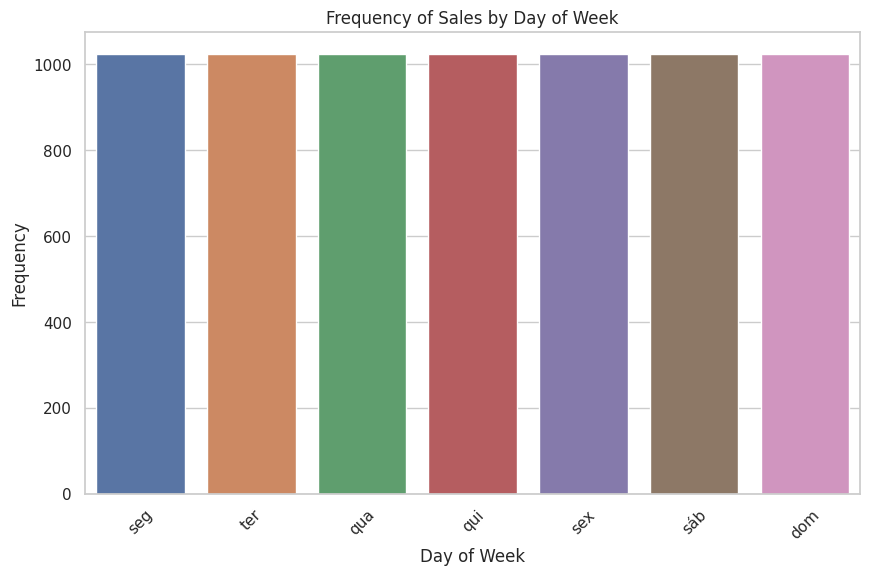

In [6]:
# Bar Plot for Day of Week
plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_week', data=data)
plt.xlabel('Day of Week')
plt.ylabel('Frequency')
plt.title('Frequency of Sales by Day of Week')
plt.xticks(rotation=45)
plt.show()

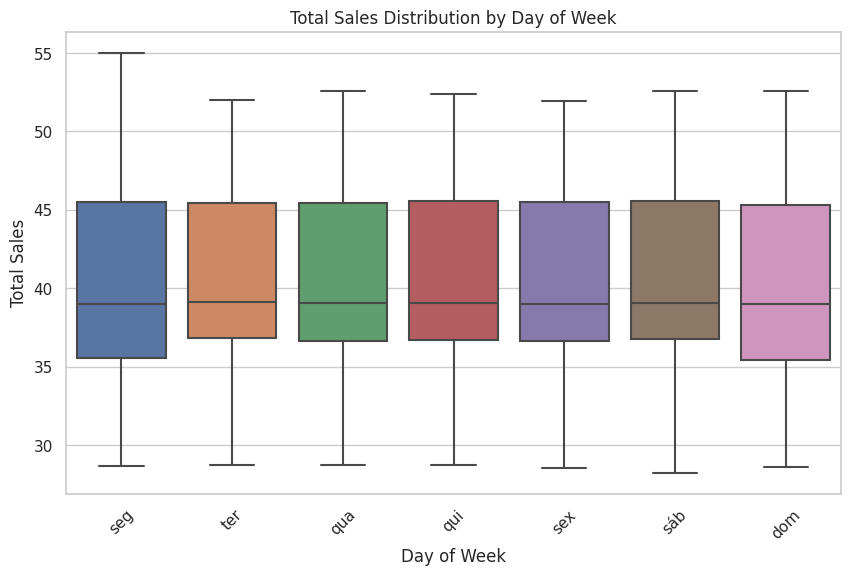

In [7]:

# Box Plot for Total Sales by Day of Week
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_week', y='total_sales', data=data)
plt.xlabel('Day of Week')
plt.ylabel('Total Sales')
plt.title('Total Sales Distribution by Day of Week')
plt.xticks(rotation=45)
plt.show()


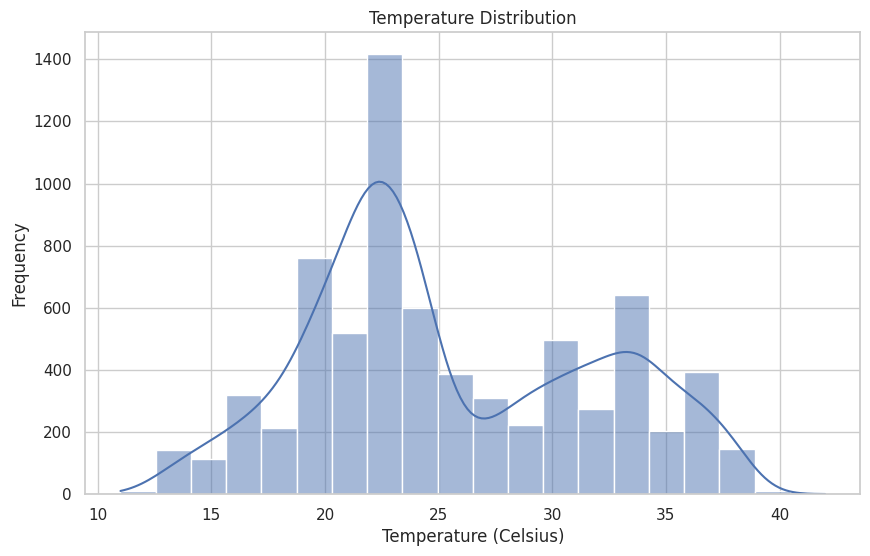

In [11]:

# Histogram for Temperature in Celsius
plt.figure(figsize=(10, 6))
sns.histplot(data['temperature_c'], bins=20, kde=True)
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Frequency')
plt.title('Temperature Distribution')
plt.show()


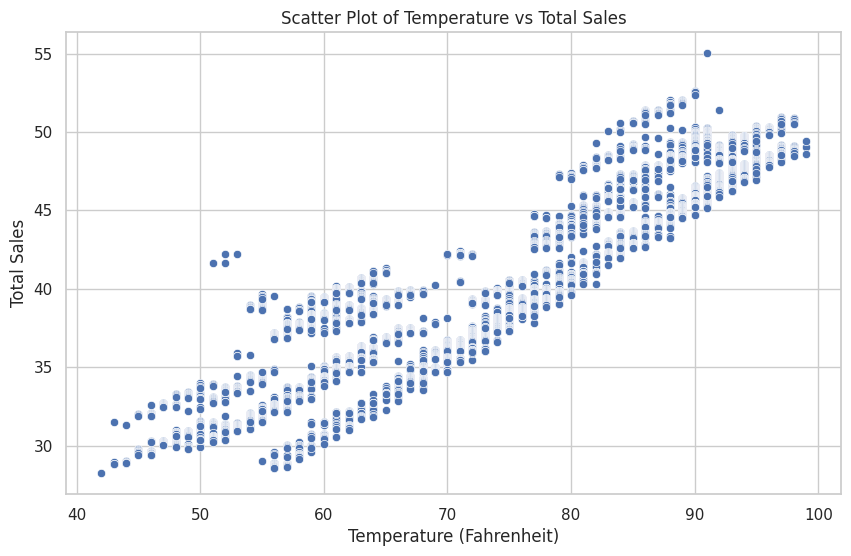

In [12]:
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temperatur_f', y='total_sales', data=data)
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Total Sales')
plt.title('Scatter Plot of Temperature vs Total Sales')
plt.show()

<Axes: xlabel='day_of_week'>

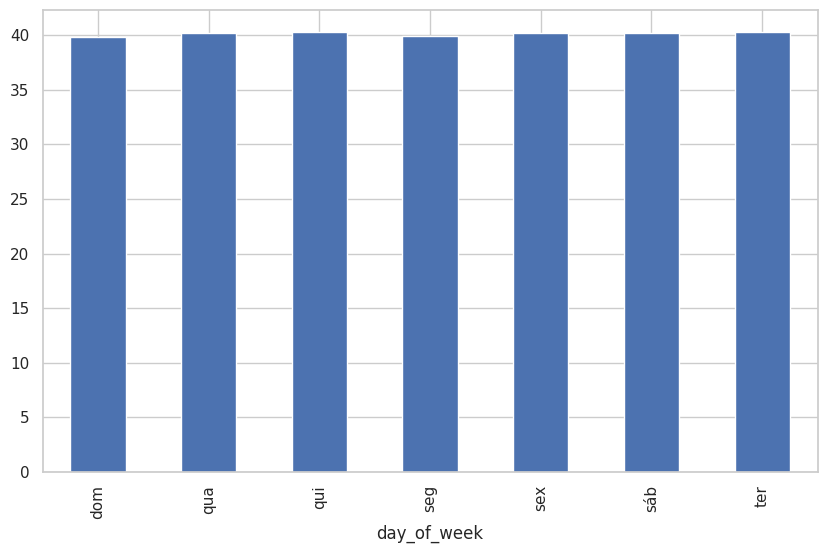

In [11]:
# Média faturamento por dia da semana
plt.figure(figsize=(10, 6))
data.groupby('day_of_week')['total_sales'].mean().plot(kind='bar')


<Axes: xlabel='month_year'>

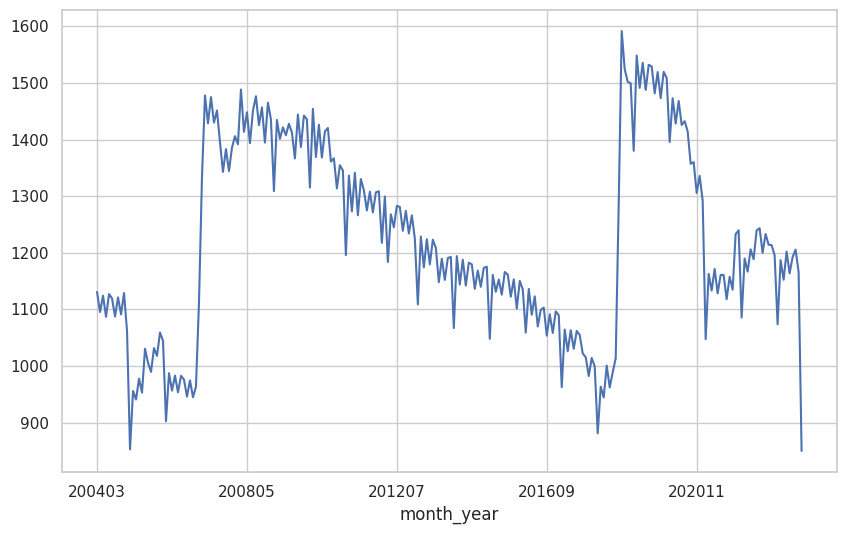

In [34]:
# Média faturamento por mes
plt.figure(figsize=(10, 6))
data.groupby('month_year')['total_sales'].sum().plot(kind='line')


236

Text(0, 0.5, 'Temperature (Fahrenheit)')

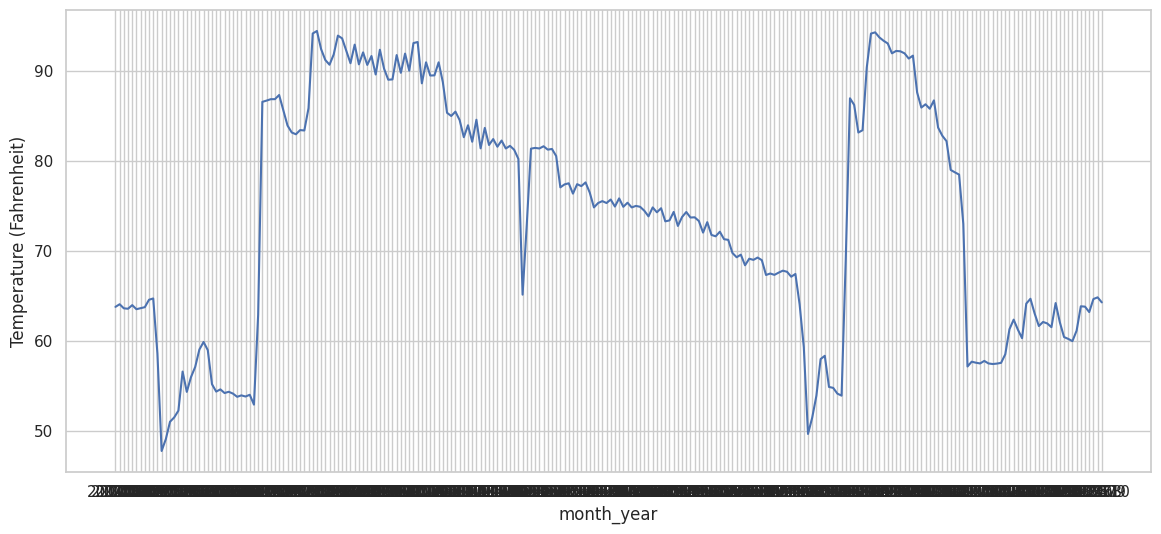

In [33]:
# build a line graph for the temperature over time using seaborn
plt.figure(figsize=(14, 6))
data_month_temp: pd.DataFrame = data.groupby("month_year")['temperatur_f'].mean()
sns.lineplot(x=data_month_temp.index, y=data_month_temp.values)
plt.xlabel('month_year')
plt.ylabel('Temperature (Fahrenheit)')


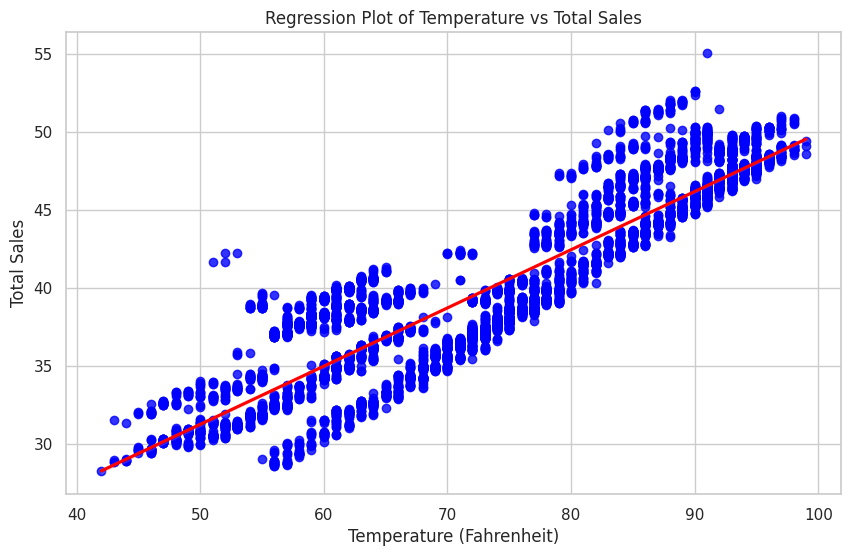

In [13]:
# Regression
plt.figure(figsize=(10, 6))
sns.regplot(x='temperatur_f', y='total_sales', data=data, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Total Sales')
plt.title('Regression Plot of Temperature vs Total Sales')
plt.show()

In [14]:
# Calculate the correlation
correlation = data['temperatur_f'].corr(data['total_sales'])

print("Correlation between temperatur_f and total_sales:", correlation)

Correlation between temperatur_f and total_sales: 0.9037112041375809


In [15]:

# Prepare the data
X = data[['temperatur_f']]
y = data['total_sales']

# Train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the slope (m) and intercept (b)
slope = model.coef_[0]
intercept = model.intercept_

print("Slope (m):", slope)
print("Intercept (b):", intercept)

Slope (m): 0.37308351667091727
Intercept (b): 12.581395230626622


total_sales=m×temperatur_f+b

total_sales = 0.37308351667091727 x temperatur_f +  12.581395230626622

In [20]:
date: str = "segunda-feira, 30 de outubro de 2023"
temperature: float = 65.0

# Predict the total sales using the model
predicted_sales = model.predict([[temperature]])[0]
print("The predicted sales for a temperature of", temperature, "degrees Fahrenheit is", predicted_sales, "dollars.")


The predicted sales for a temperature of 65.0 degrees Fahrenheit is 36.831823814236245 dollars.


/home/senoj/Documents/projetos/mba_projects/eEDB002/atividade_1/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# CONCLUSÃO

O faturamento com a venda de sorventes independe do dia da semana ou do mês, a única variável é a temperatura, quando a temperatura aumenta, o faturamento obtido pela venda de sorvetes aumenta também. Podemos ver que as vendas cairam durantes o ano 2008 e 2017, que tem alta correlação com a queda da temperatura. Pelas análises feitas, podemos inferir que as pessoas compram mais sorvetes nos dias quentes.

# Recomendações
Dado que existe uma relação entre a temperatura média do dia e o faturamento, pode-se utilizar previsões meteorológicas para estimar a produção de sorvetes baseado na temperatura dos pŕoximos dias, evitando assim desperdício caso a previsão seja de frio, mesmo estando em uma estação quente. Pois, como foi visto nos gráficos, independe do mes do ano ou dia da semana.